# Manish Chauhan
# PRN - 39

# Load Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Loading CSV File

In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Exploring Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Filling Null Values of Attributes

In [6]:
df['ph'] = df['ph'].fillna(value=df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(value=df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean())

In [7]:
df.duplicated().sum()

0

# EDA

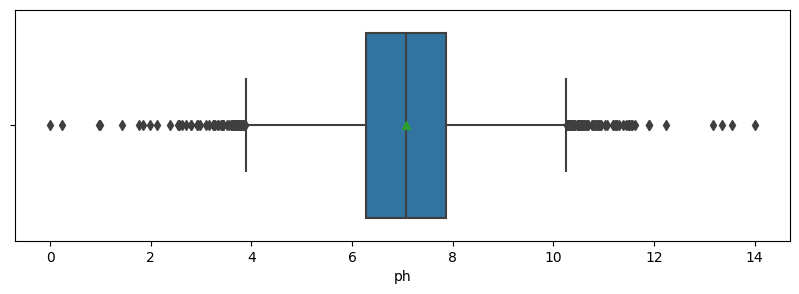

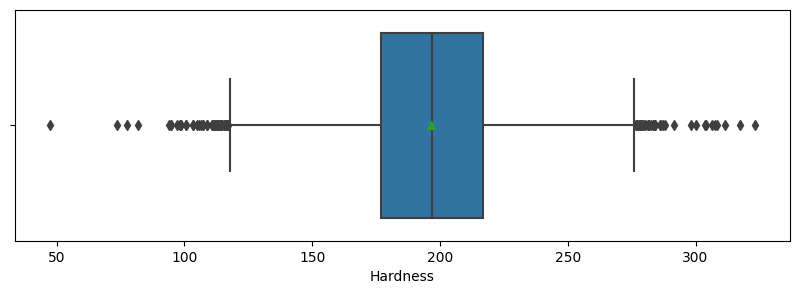

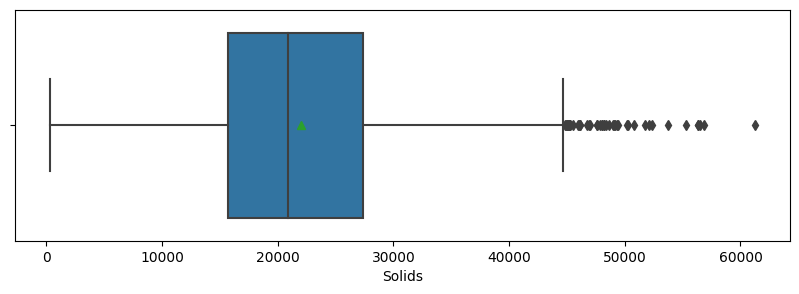

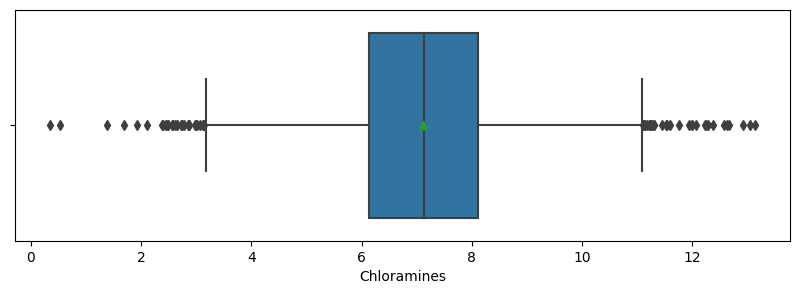

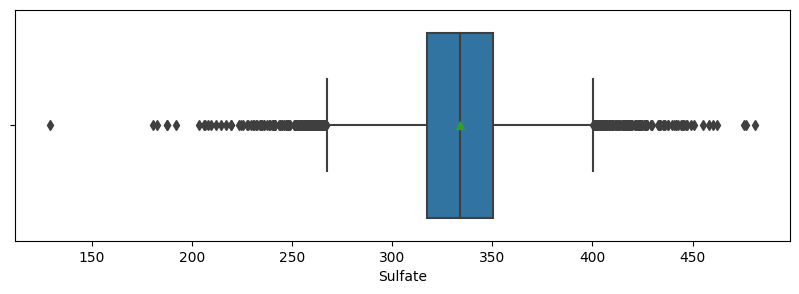

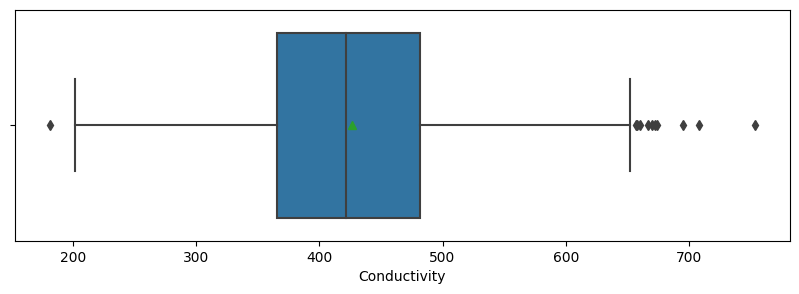

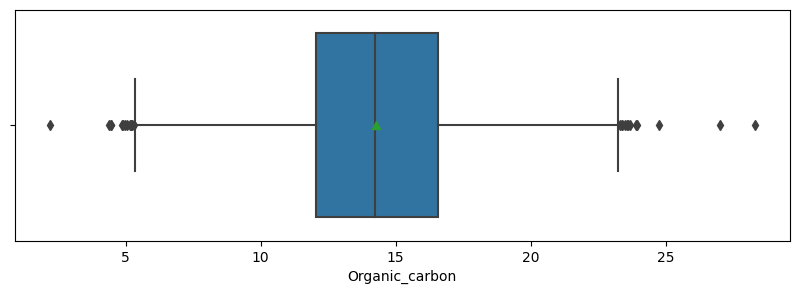

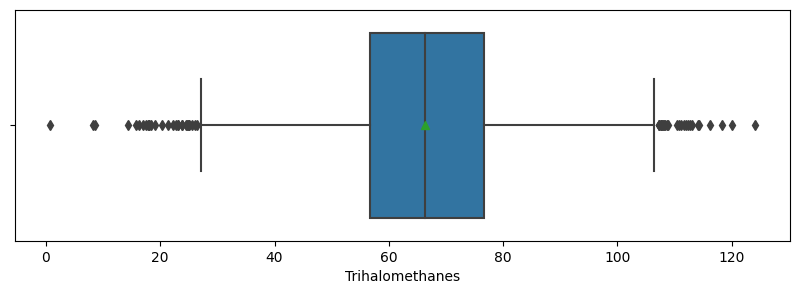

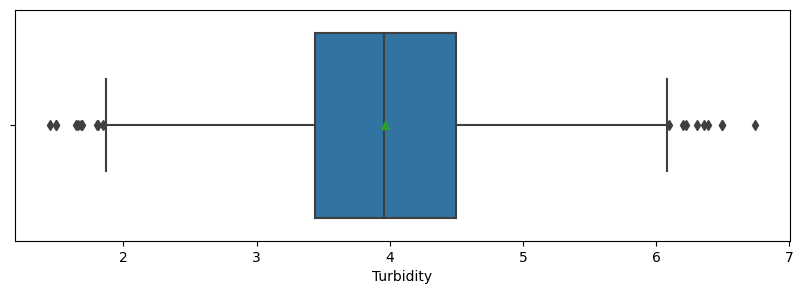

In [8]:
for col in df.drop('Potability', axis=1).columns :
  plt.figure(figsize=(10,3))
  sns.boxplot(x=df[col], showmeans=True)
  plt.xlabel(col)
  plt.show

<Figure size 1000x400 with 0 Axes>

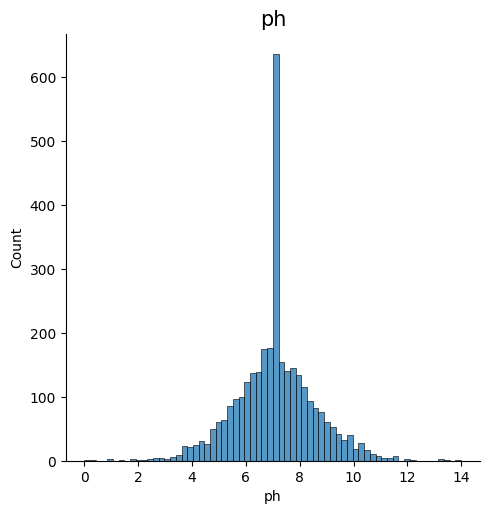

<Figure size 1000x400 with 0 Axes>

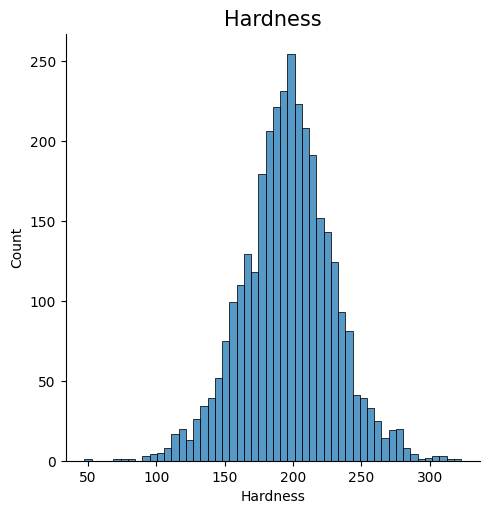

<Figure size 1000x400 with 0 Axes>

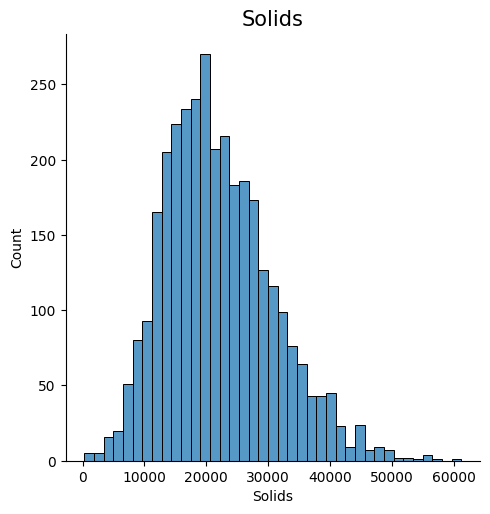

<Figure size 1000x400 with 0 Axes>

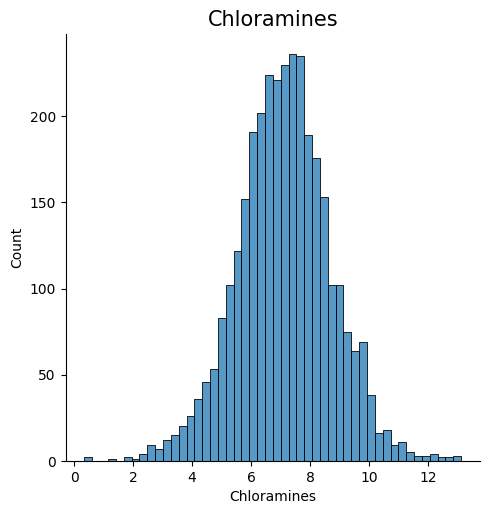

<Figure size 1000x400 with 0 Axes>

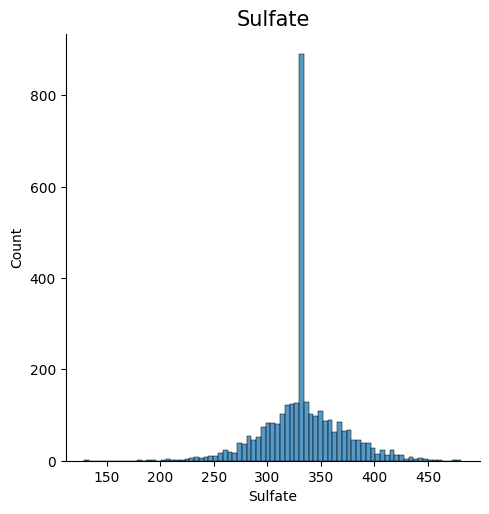

<Figure size 1000x400 with 0 Axes>

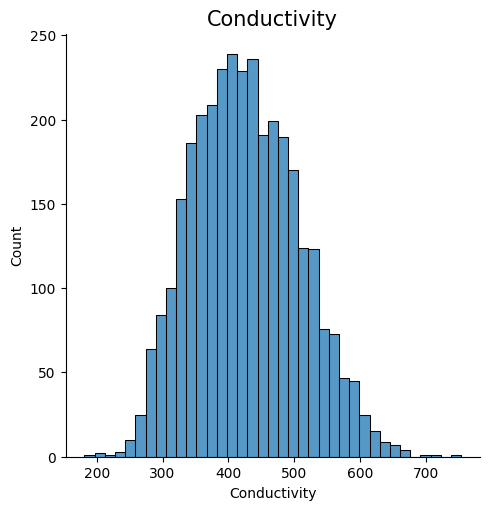

<Figure size 1000x400 with 0 Axes>

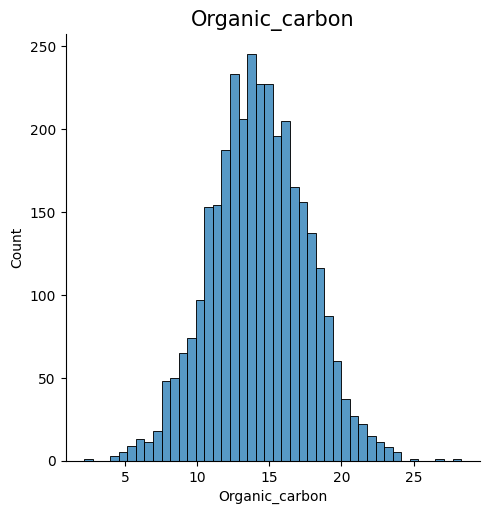

<Figure size 1000x400 with 0 Axes>

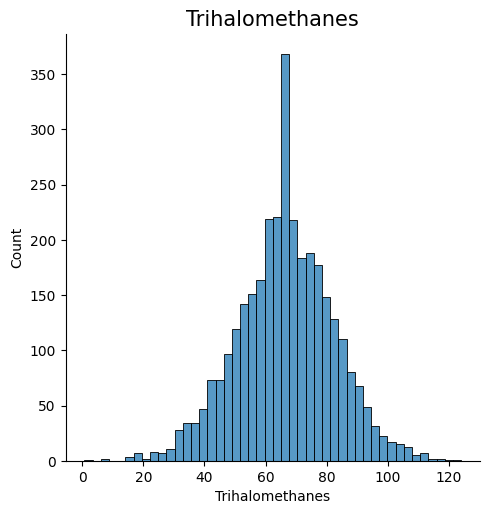

<Figure size 1000x400 with 0 Axes>

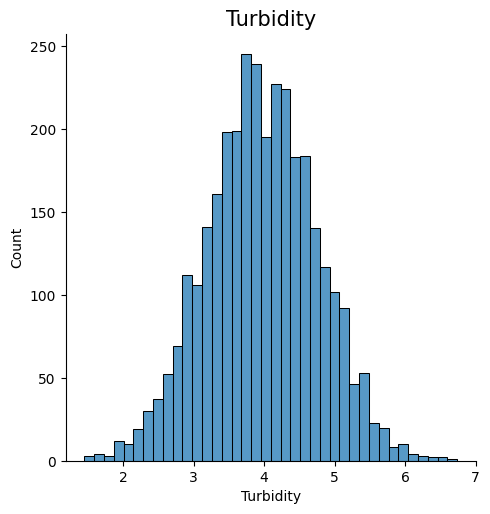

In [9]:
for col in df.drop('Potability', axis=1).columns :
  plt.figure(figsize=(10,4), dpi=100)
  sns.displot(df[col])
  plt.title(f"{col}", size=15)
  plt.show

# Correlation

<Axes: >

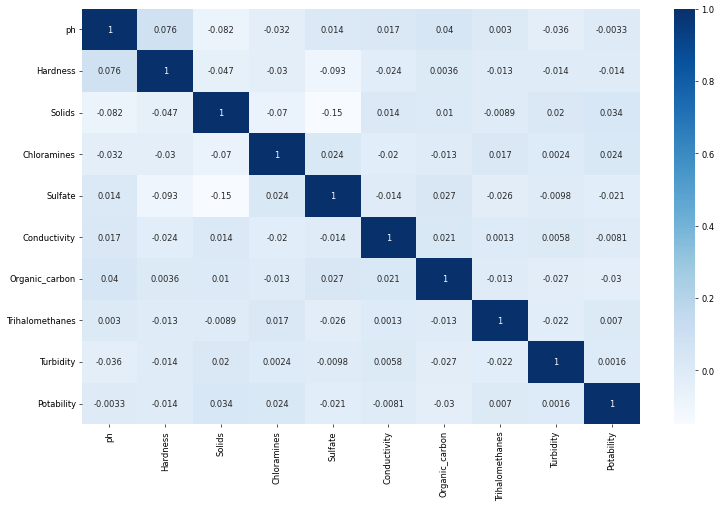

In [10]:
corr = df.corr()
plt.figure(figsize=(15,9), dpi=60)
sns.heatmap(corr, cmap='Blues',annot=True)

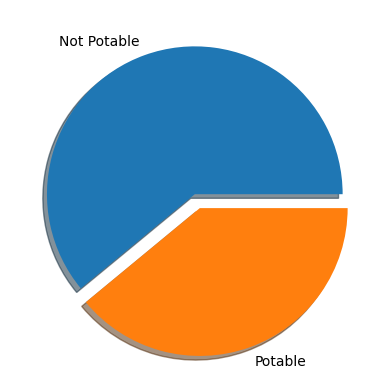

In [11]:
plt.pie(x=df["Potability"].value_counts(),
        labels=["Not Potable","Potable"],
        shadow = True,
        explode = (0, 0.1)
        )

plt.show()

# Train Test Split

In [12]:
X = df.drop('Potability', axis=1)
y = df['Potability']

# Normalization

In [13]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

# Random Forest

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
forest = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=10)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [16]:
pred = forest.predict(X_test)

In [17]:
accuracy_score(y_test, pred)*100

69.66463414634147

# Tuning

In [18]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_split' : [2,3,10],
          'min_samples_leaf' : [1,3,10],
          'n_estimators' : [100,200,500],
          'random_state' : [42]}

grid_search_cv = GridSearchCV(RandomForestClassifier(),
                              params,
                              verbose=0,
                              cv=5,
                              n_jobs=-1)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 200, 500],
                         'random_state': [42]})

In [19]:
pred_grid_search = grid_search_cv.predict(X_test)

In [20]:
accuracy_score(pred_grid_search, y_test)

0.6798780487804879

In [21]:
grid_search_cv.best_params_

{'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500,
 'random_state': 42}

In [22]:
grid_search_cv.best_estimator_

RandomForestClassifier(min_samples_split=10, n_estimators=500, random_state=42)

# Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_predict

y_pr = cross_val_predict(forest, X_train, y_train, cv=5)

In [24]:
confusion_matrix(y_train, y_pr)

array([[1467,  119],
       [ 770,  264]])

In [25]:
precision_score(y_train, y_pr)

0.6892950391644909

In [26]:
recall_score(y_train, y_pr)

0.2553191489361702

In [27]:
import pickle

In [28]:
file = open('random_forest_model.pkl', 'wb')
pickle.dump(forest, file)